<a href="https://colab.research.google.com/github/praisyprincy005/OIBSIP-harshica.K.S/blob/main2/Copy_of_TASK_1_Project_EDA_on_Retail_Sales_Datas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/Kaggle_datasets OASIS INFOBYTE'

In [ ]:
%cd /content/gdrive/MyDrive/Kaggle_datasets OASIS INFOBYTE

/content/gdrive/MyDrive/Kaggle_datasets OASIS INFOBYTE


In [ ]:
!ls

'kaggle (4).json'


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Kaggle_datasets OASIS INFOBYTE/retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.dropna(inplace=True)  # Remove missing values
df = df[df['Quantity'] > 0]  # Remove negative quantities
df = df[df['Price per Unit'] > 0]

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.weekday

In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
summary_stats = df.describe()

print(summary_stats)

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [ ]:
monthly_sales = df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

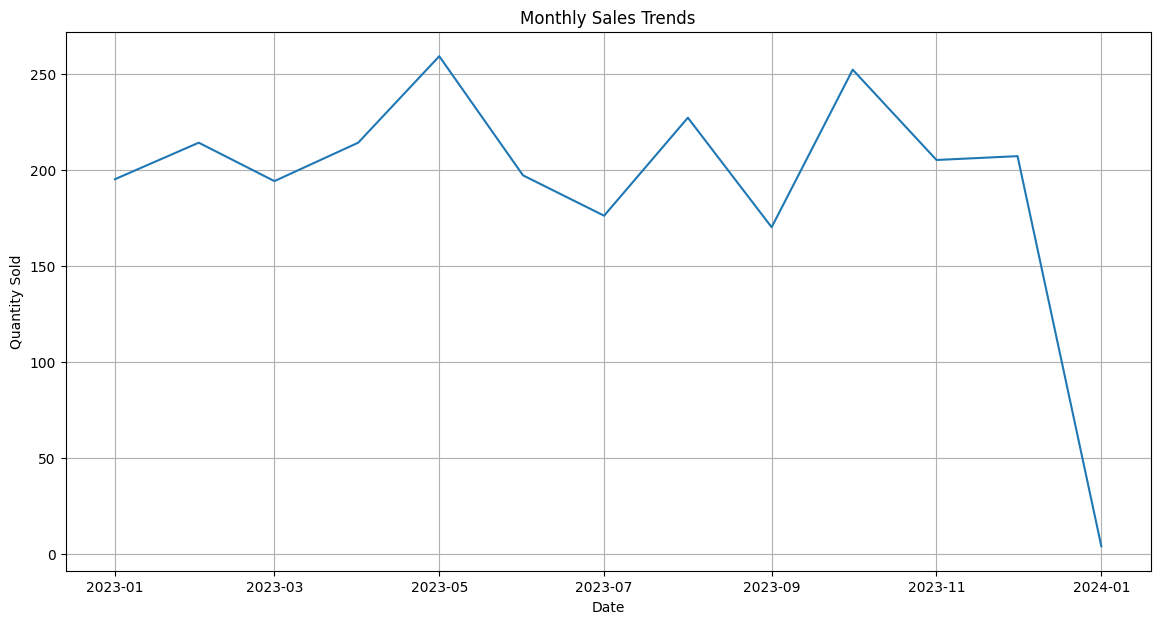

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['Date'], monthly_sales['Quantity'])
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

In [ ]:
# Customer and Product Analysis
top_customers = df.groupby('Customer ID')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Quantity Purchased:")
print(top_customers)

Top 10 Customers by Quantity Purchased:
Customer ID
CUST500    4
CUST628    4
CUST259    4
CUST615    4
CUST257    4
CUST619    4
CUST253    4
CUST251    4
CUST626    4
CUST632    4
Name: Quantity, dtype: int64


In [ ]:
top_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity Sold:")
print(top_products)


Top 10 Products by Quantity Sold:
Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


<ipython-input-33-f04118a7cd92>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')


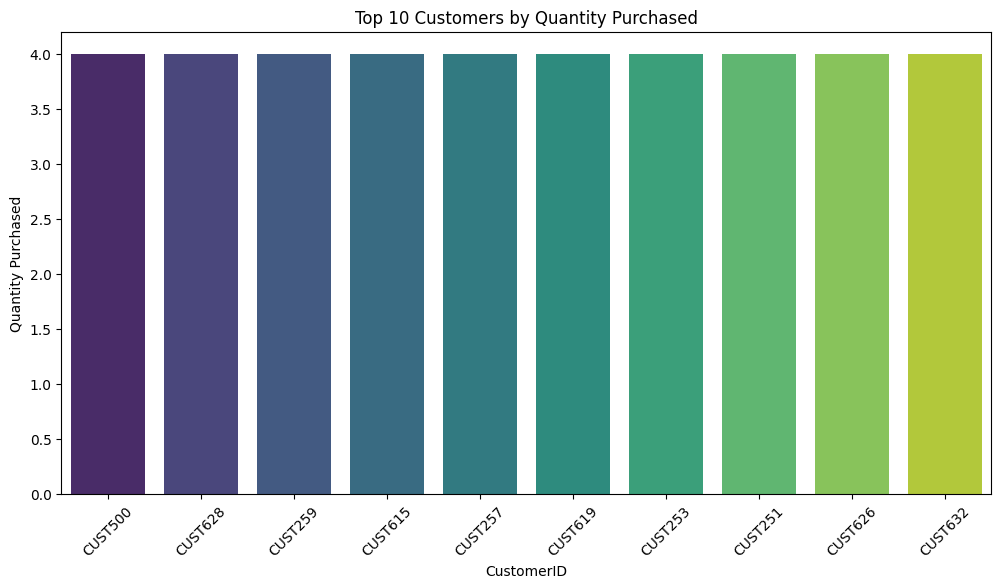

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')
plt.title('Top 10 Customers by Quantity Purchased')
plt.xlabel('CustomerID')
plt.ylabel('Quantity Purchased')
plt.xticks(rotation=45)
plt.show()

<ipython-input-34-a6044bc21ea4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')


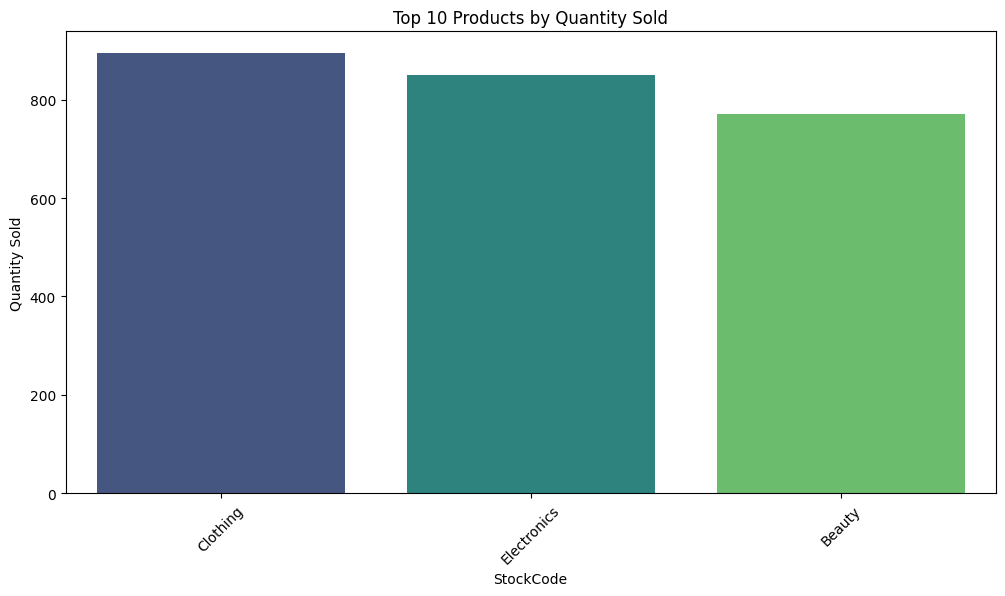

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('StockCode')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

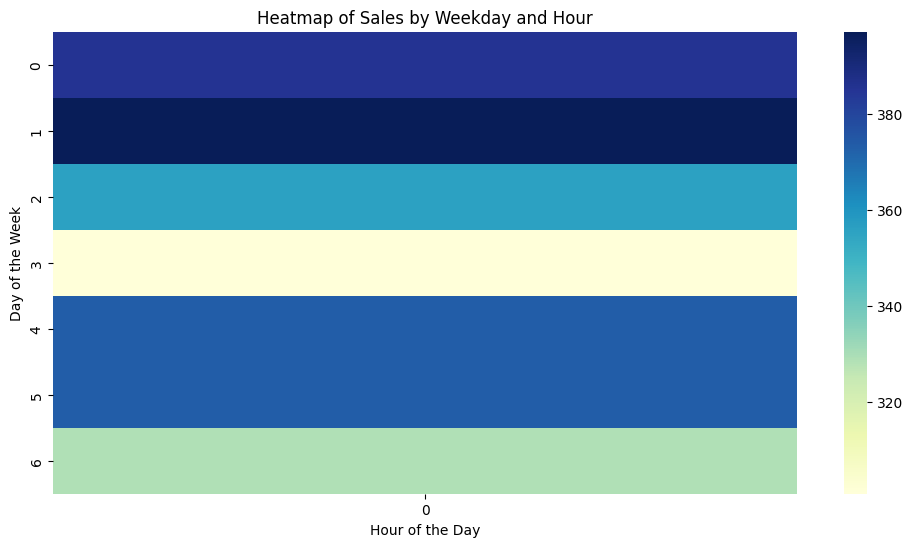

In [ ]:
sales_by_weekday_hour = df.groupby(['Weekday', 'Hour'])['Quantity'].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(sales_by_weekday_hour, cmap='YlGnBu')
plt.title('Heatmap of Sales by Weekday and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


In [ ]:
print("Recommendations:")
print("1. Focus on the top-performing customers and provide them with personalized offers to increase sales.")
print("2. Stock up on the top-selling products to ensure availability and prevent stockouts.")
print("3. Analyze the heatmap to optimize staffing and inventory levels during peak sales hours.")
print("4. Investigate potential reasons for any observed trends or anomalies in the time series analysis.")
print("5. Consider promotional strategies or discounts during off-peak hours to balance the sales distribution.")

# Save the cleaned data for future use
df.to_csv('cleaned_retail_sales_data.csv', index=False)

Recommendations:
1. Focus on the top-performing customers and provide them with personalized offers to increase sales.
2. Stock up on the top-selling products to ensure availability and prevent stockouts.
3. Analyze the heatmap to optimize staffing and inventory levels during peak sales hours.
4. Investigate potential reasons for any observed trends or anomalies in the time series analysis.
5. Consider promotional strategies or discounts during off-peak hours to balance the sales distribution.
